In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:
global_temp_country = pd.read_csv('data/GlobalLandTemperaturesByCountry-cleaned.csv')
global_temp_country.head()

,code,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,AE,1/1/1900,17.651,0.992,United Arab Emirates
1,AE,2/1/1900,19.706,0.802,United Arab Emirates
2,AE,3/1/1900,24.145,0.643,United Arab Emirates
3,AE,4/1/1900,28.777,0.510,United Arab Emirates
4,AE,5/1/1900,31.070,0.811,United Arab Emirates


In [4]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
   ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
    'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
  ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
    locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')
plt.savefig("../Images/globe.png")

<Figure size 432x288 with 0 Axes>

In [10]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
global_temp_country['year'] = pd.DatetimeIndex(global_temp_country['dt']).year
global_temp_country.head()

,code,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,AE,1/1/1900,17.651,0.992,United Arab Emirates,1900
1,AE,2/1/1900,19.706,0.802,United Arab Emirates,1900
2,AE,3/1/1900,24.145,0.643,United Arab Emirates,1900
3,AE,4/1/1900,28.777,0.510,United Arab Emirates,1900
4,AE,5/1/1900,31.070,0.811,United Arab Emirates,1900


In [31]:
#global_temp = pd.read_csv("data/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp_country['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp_country[global_temp_country['dt'].apply(
        lambda x: x[:4]) == year]['AverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp_country[global_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
    )

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [25]:
 # Is there a global warming?
#global_temp = pd.read_csv("../input/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp_country['year']
mean_temp_world_uncertainty = []

for y in years:
    mean_temp_world.append(global_temp_country[global_temp_country['year']['AverageTemperature'].mean()
    mean_temp_world_uncertainty.append(global_temp_country[global_temp_country['year']['AverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


SyntaxError: invalid syntax (<ipython-input-25-b291dedb41ba>, line 6)

In [34]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(year[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))
    layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [6]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
 )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')
plt.savefig("../Images/AverageTemp.png")

<Figure size 432x288 with 0 Axes>

In [7]:
global_gas_emissions = pd.read_csv('data/greenhouse-gas-emissions-by-sector-cleaned.csv')
global_gas_emissions.head()

,Country,Code,Year,Other sources (tonnes),Waste (tonnes),Industry (tonnes),Residential & commercial (tonnes),Transport (tonnes),Agriculture (tonnes),Forestry (tonnes),Land use sources (tonnes),Energy (tonnes)
0,United Arab Emirates,AE,1990,310527.5,444504.5,2785570.6,306752.7,11301489.1,497680.5,-1191666.7,0.0,56556074.5
1,United Arab Emirates,AE,1991,331608.4,471386.3,3177115.8,288389.3,11630969.6,559625.6,-1191666.7,0.0,63231831.6
2,United Arab Emirates,AE,1992,334097.6,500099.0,3265566.2,280010.3,11820973.6,621645.6,-1191666.7,0.0,61630923.9
3,United Arab Emirates,AE,1993,355901.4,532860.7,3267567.5,816398.0,12617709.9,661976.1,-1191666.7,0.0,62711303.6
4,United Arab Emirates,AE,1994,368164.2,565969.6,3578521.7,948585.1,12499745.3,727983.6,-1191666.7,0.0,69018296.4


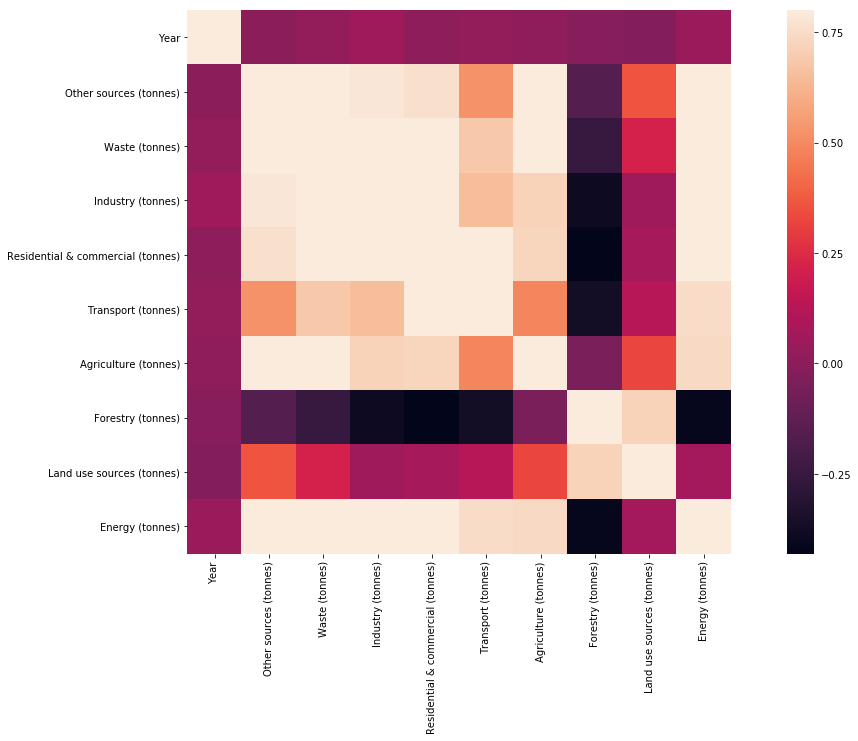

In [8]:
corrmat = global_gas_emissions.corr()
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corrmat, vmax=.8, square=True)